# Prep HAT-P-11 light curve for STSP

* Load long and short cadence light curves
* Normalize, paste short cadence into the long cadence
* (downsample long cadence)

In [199]:
%matplotlib inline
import astropy.units as u
import datacleaner
reload(datacleaner)
from datacleaner import LightCurve, combine_short_and_long_cadence

data_path = '/astro/users/bmmorris/git/hat-11/data'

normalized_long = LightCurve.from_dir('normalized_long')
transits_short = LightCurve.from_dir('transits_short')

In [200]:
import matplotlib.pyplot as plt

# n = 250
# plt.plot(transits_short.times.jd[:n], transits_short.fluxes[:n],'.')
# plt.plot(normalized_long.times.jd[:n], normalized_long.fluxes[:n],'.')
# plt.show()

long_transits = LightCurve(name='transits_long', 
                           **normalized_long.mask_out_of_transit(oot_duration_fraction=1.5)
                          ).get_transit_light_curves()

# Normalize each short transit to have OOT baseline=1
short_transits = LightCurve.from_dir('transits_short').get_transit_light_curves()
for transit in short_transits:
    transit.remove_linear_baseline()

(0.30191814512975435, 0.020433924160897732, 2.4439009)
(0.02819474873586687, 0.00068111903965473175, 2.4439009)


**TODO**: Use `fit_linear_baseline` to fit for OOT-trend for each transit, then normalize each short-cadence transit light curve by the baseline. Then merge the renormalized short cadence data with the long cadence data (after downsampling the long cadence data) by cutting out times from the long cadence light curve that are within the times sampled by the short cadence data, and inserting the short cadence data.

In [201]:
hat11 = combine_short_and_long_cadence(short_transits, long_transits, normalized_long, name='hat11')

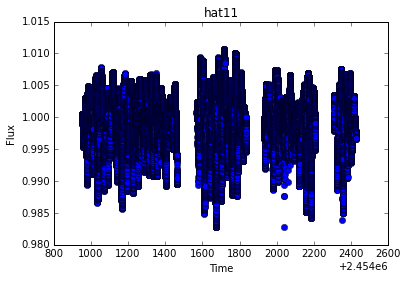

In [203]:
hat11.save_to(data_path, overwrite=True)
hat11.plot()